In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# plotting defaults
plt.rc('figure', figsize=(10, 4))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
filename = 'tsa_store_data.csv'
df = pd.read_csv(filename, index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 1 to 10
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_id        913000 non-null  int64  
 1   item_upc14     913000 non-null  int64  
 2   item_upc12     913000 non-null  int64  
 3   item_brand     913000 non-null  object 
 4   item_name      913000 non-null  object 
 5   item_price     913000 non-null  float64
 6   sale_id        913000 non-null  int64  
 7   sale_date      913000 non-null  object 
 8   sale_amount    913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_zipcode  913000 non-null  int64  
 11  store_city     913000 non-null  object 
 12  store_state    913000 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 97.5+ MB


In [4]:
import preparer as pre

In [5]:
pre.convert_dates(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 1 to 10
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_id        913000 non-null  int64         
 1   item_upc14     913000 non-null  int64         
 2   item_upc12     913000 non-null  int64         
 3   item_brand     913000 non-null  object        
 4   item_name      913000 non-null  object        
 5   item_price     913000 non-null  float64       
 6   sale_id        913000 non-null  int64         
 7   sale_date      913000 non-null  datetime64[ns]
 8   sale_amount    913000 non-null  int64         
 9   store_address  913000 non-null  object        
 10  store_zipcode  913000 non-null  int64         
 11  store_city     913000 non-null  object        
 12  store_state    913000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 97.5+ MB


In [7]:
by_date = pre.date_to_index(df)

In [8]:
by_date.head()

,sale_date,sale_amount
0,2013-01-01,13696
1,2013-01-02,13678
2,2013-01-03,14488
3,2013-01-04,15677
4,2013-01-05,16237


In [9]:
by_date = by_date.set_index('sale_date').sort_index()

In [10]:
by_date.isnull().sum()

sale_amount    0
dtype: int64

In [11]:
by_date.shape

(1826, 1)

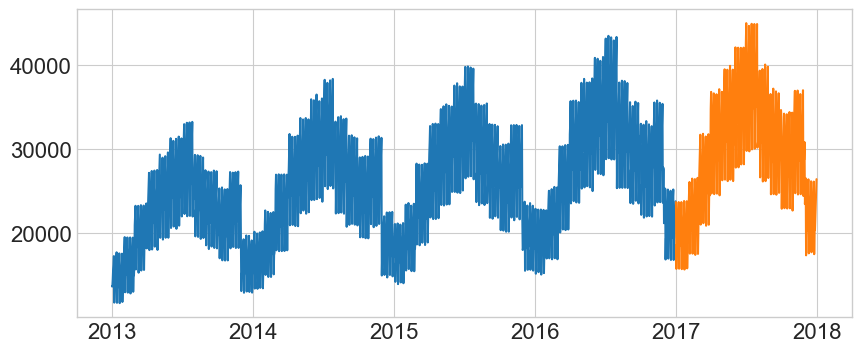

In [12]:
train = by_date[:'2016'] # includes 2016
test = by_date['2017']

plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)


In [13]:
y = train.sale_amount
y.head()

sale_date
2013-01-01    13696
2013-01-02    13678
2013-01-03    14488
2013-01-04    15677
2013-01-05    16237
Name: sale_amount, dtype: int64

<AxesSubplot:xlabel='sale_date'>

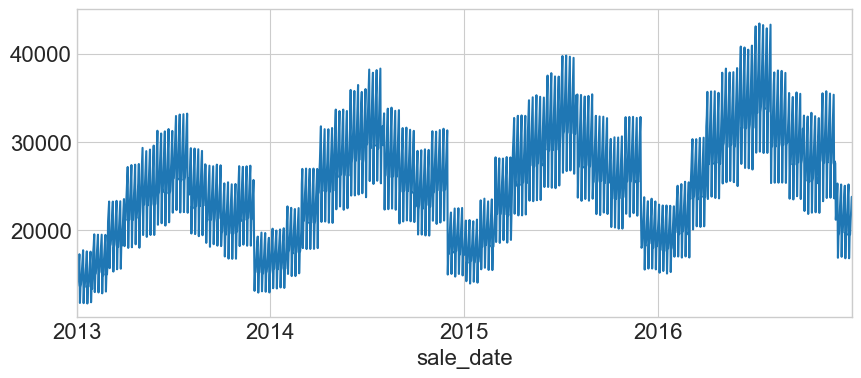

In [14]:
y.plot()

<AxesSubplot:xlabel='sale_date'>

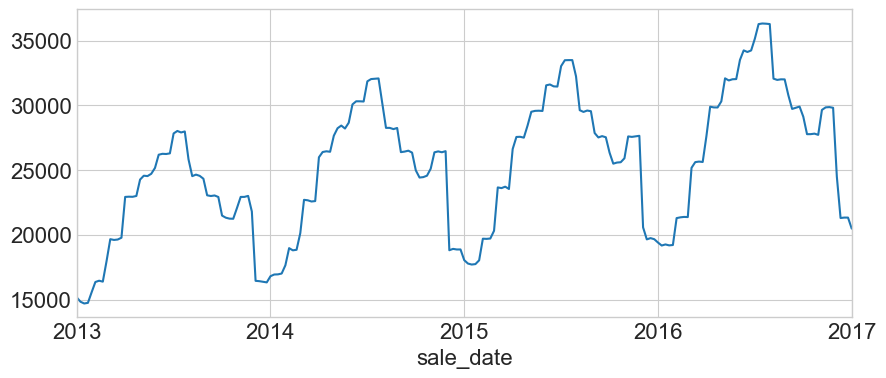

In [15]:
y.resample('W').mean().plot()

<AxesSubplot:xlabel='sale_date'>

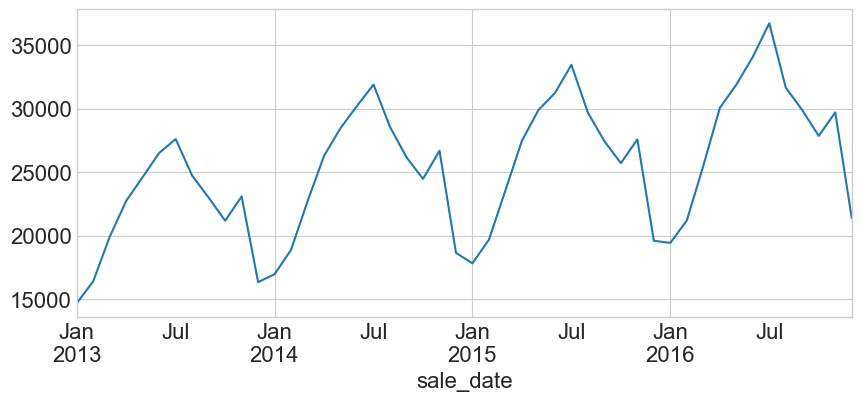

In [16]:
y.resample('M').mean().plot()

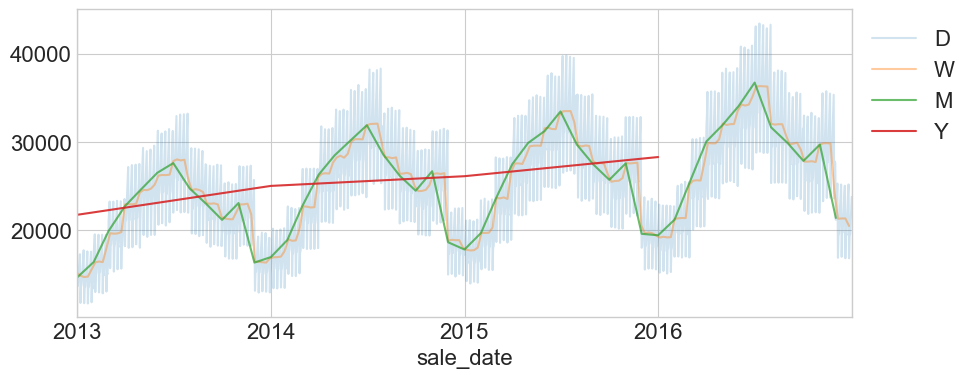

In [18]:
y.plot(alpha=.2, label='D')
y.resample('W').mean().plot(alpha=.4, label='W')
y.resample('M').mean().plot(alpha=.7,label='M')
y.resample('Y').mean().plot(alpha=.9,label='Y')
plt.legend(bbox_to_anchor=(1,1))

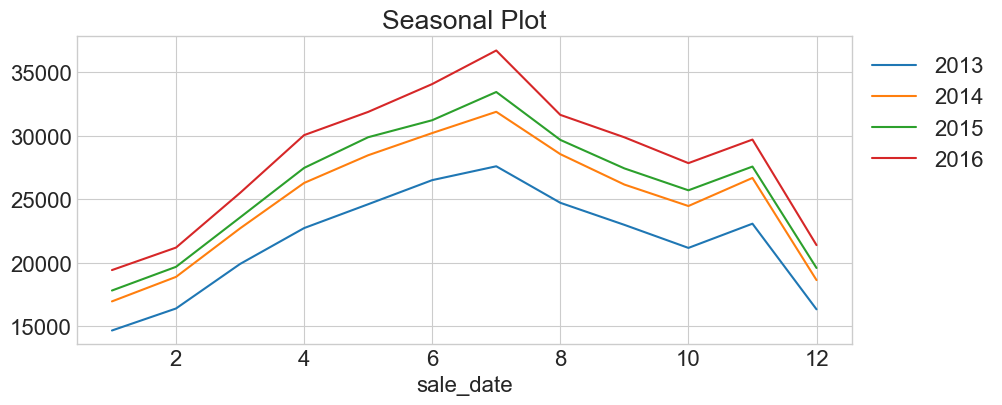

In [21]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
plt.legend(bbox_to_anchor=(1,1))

Text(0.5, 1.0, 'Lag plot with lag=1 day')

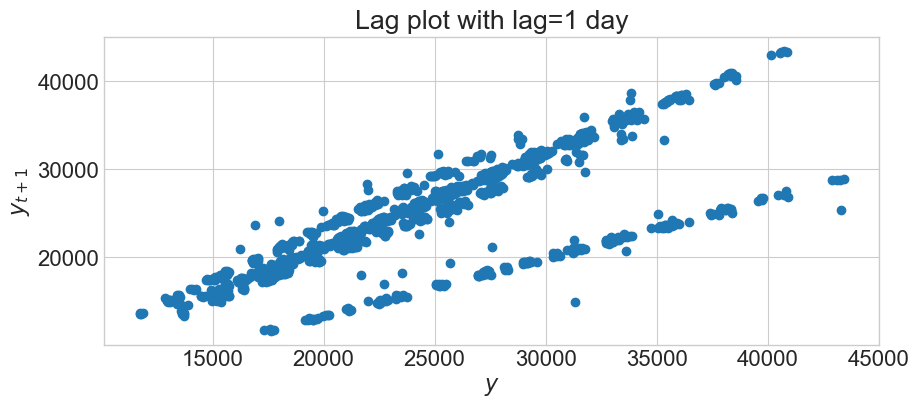

In [22]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1 day')

<AxesSubplot:xlabel='this_week', ylabel='the_next_week'>

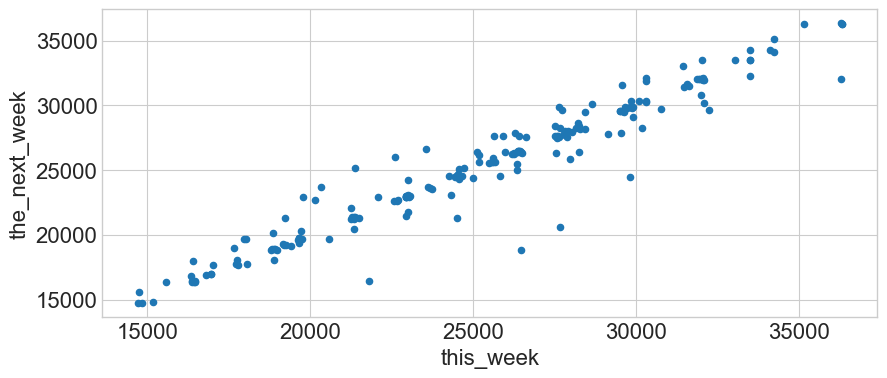

In [25]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sale_amount.shift(-1)
weekly = weekly.rename(columns={'sale_amount': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')

In [26]:
y = train.sale_amount.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,15177.833333,NaN,-7203.156248,NaN
2013-01-13,14843.142857,NaN,-7373.736834,NaN
2013-01-20,14707.142857,NaN,-7420.442878,NaN
2013-01-27,14756.857143,NaN,-7465.849013,NaN
2013-02-03,15575.285714,NaN,-7206.299105,NaN


<AxesSubplot:xlabel='sale_date'>

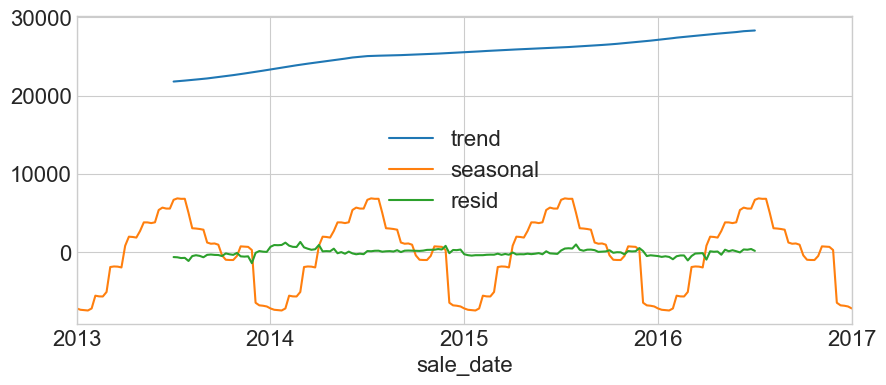

In [27]:
decomposition.iloc[:, 1:].plot()

# OPSD

In [29]:
filename = 'opsd_data.csv'
df = pd.read_csv(filename, index_col=0)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 205.5+ KB


In [31]:
pre.convert_date_opsd(df)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 205.5 KB


In [33]:
df = pre.index_date_opsd(df)

In [34]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [35]:
df.fillna(0,inplace=True)

In [36]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0
2006-01-04,1457.217,0.0,0.0,0.0
2006-01-05,1477.131,0.0,0.0,0.0


In [37]:
bye_cols = ['Wind','Solar','Wind+Solar']
df.drop(columns=bye_cols,inplace=True)

In [38]:
df.head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


In [40]:
df.tail()

,Consumption
Date,
2017-12-27,1263.94091
2017-12-28,1299.86398
2017-12-29,1295.08753
2017-12-30,1215.44897
2017-12-31,1107.11488


In [42]:
df.columns = df.columns.str.lower()

In [49]:
df.head()

,consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


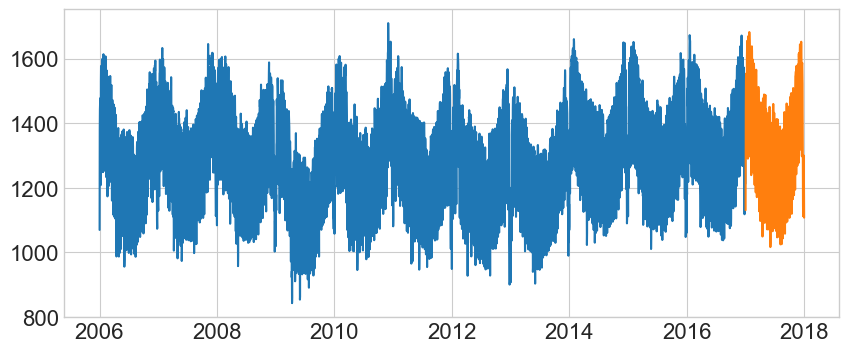

In [50]:
train = df[:'2016'] # includes 2016
test = df['2017']

plt.plot(train.index, train.consumption)
plt.plot(test.index, test.consumption)

In [51]:
y = train.consumption
y.head()

Date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Name: consumption, dtype: float64

<AxesSubplot:xlabel='Date'>

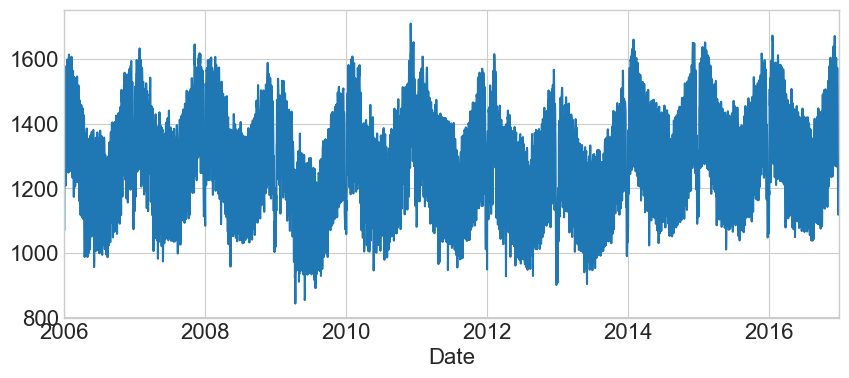

In [52]:
y.plot()

<AxesSubplot:xlabel='Date'>

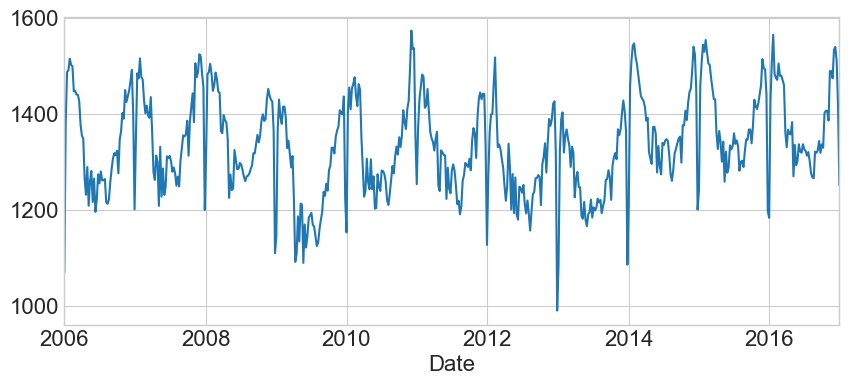

In [53]:
y.resample('W').mean().plot()

<AxesSubplot:xlabel='Date'>

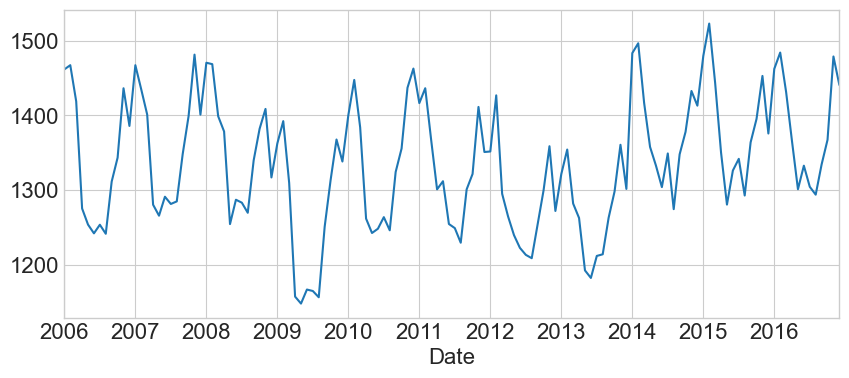

In [54]:
y.resample('M').mean().plot()

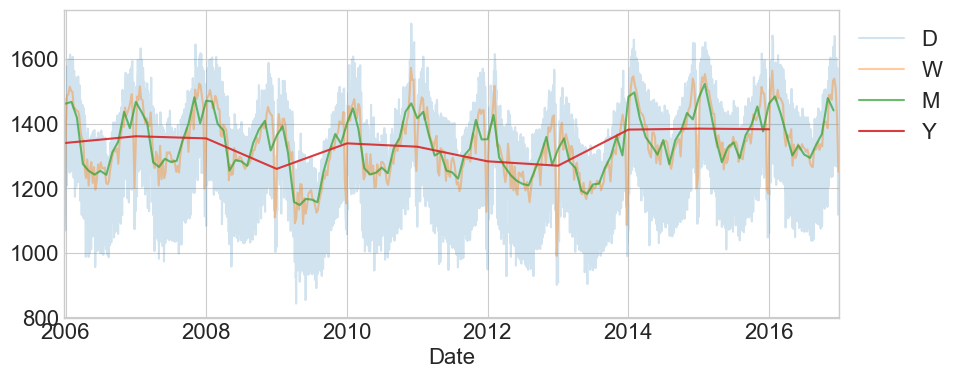

In [55]:
y.plot(alpha=.2, label='D')
y.resample('W').mean().plot(alpha=.4, label='W')
y.resample('M').mean().plot(alpha=.7,label='M')
y.resample('Y').mean().plot(alpha=.9,label='Y')
plt.legend(bbox_to_anchor=(1,1))

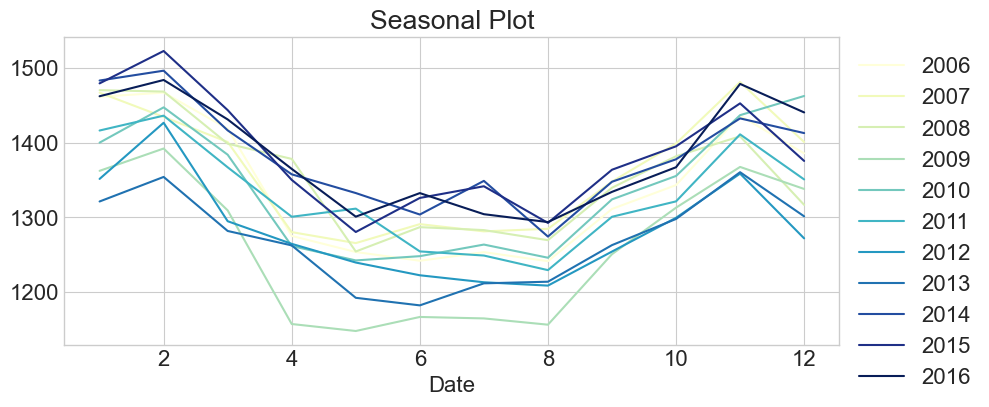

In [58]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(colormap='YlGnBu',title='Seasonal Plot')
plt.legend(bbox_to_anchor=(1,1))

Text(0.5, 1.0, 'Lag plot with lag=1 day')

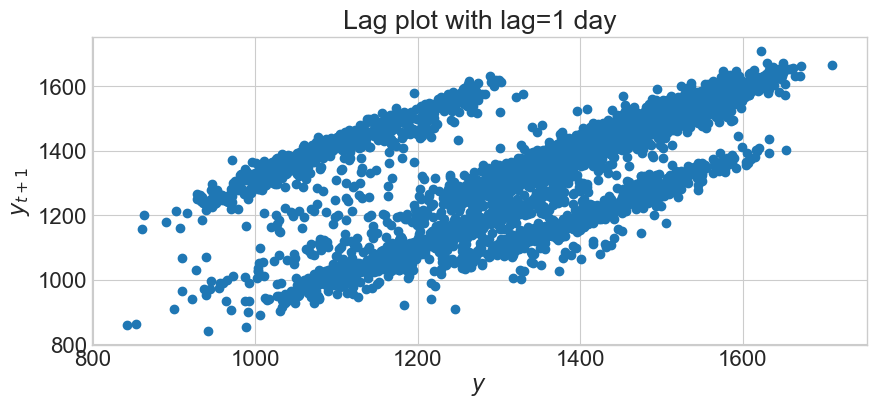

In [59]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1 day')

<AxesSubplot:xlabel='consumption', ylabel='the_next_week'>

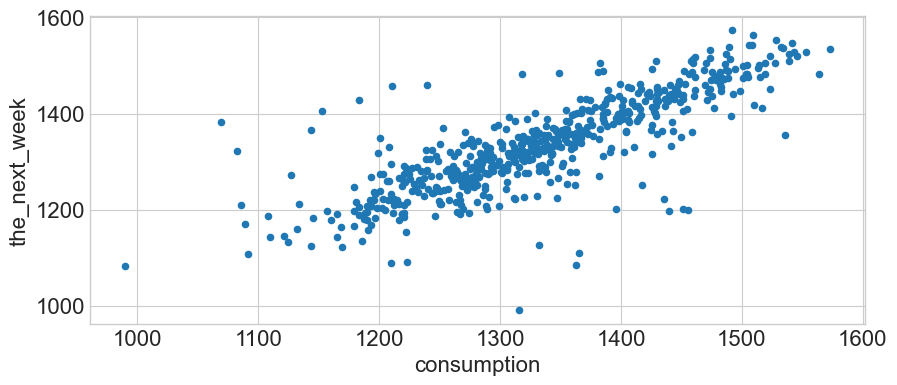

In [70]:
weekly = train.consumption.resample('W').mean()
weekly = pd.DataFrame(weekly)
weekly['the_next_week'] = weekly.consumption.shift(-1)
#weekly = weekly.rename(columns={'sale_amount': 'this_week'})
weekly.plot.scatter(x='consumption', y='the_next_week')

In [73]:
y = train.consumption.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
Date,,,,
2006-01-31,1461.442065,NaN,88.156733,NaN
2006-02-28,1467.106893,NaN,112.641997,NaN
2006-03-31,1418.649161,NaN,38.778445,NaN
2006-04-30,1275.058900,NaN,-36.445327,NaN
2006-05-31,1253.488484,NaN,-77.787577,NaN


<AxesSubplot:xlabel='Date'>

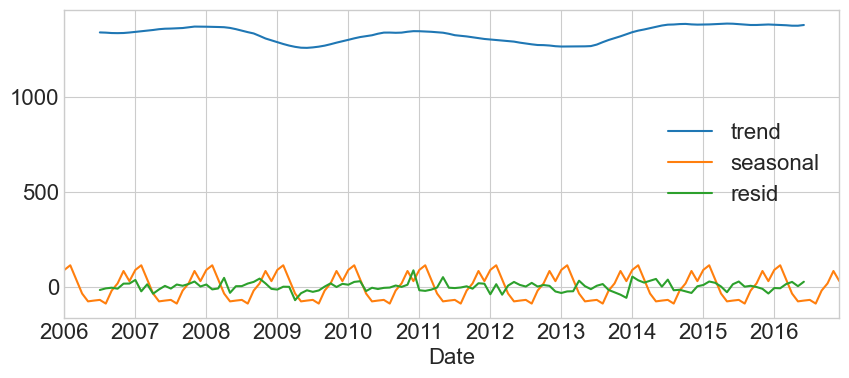

In [74]:
decomposition.iloc[:, 1:].plot()